# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.compose import ColumnTransformer

# Import dataset

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


# Fill with `missing` word

## Train test split

In [5]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
imputer = SimpleImputer(strategy='constant',fill_value='missing')

In [8]:
imputer.fit(X_train)

SimpleImputer(fill_value='missing', strategy='constant')

In [9]:
imputer.statistics_

array(['missing', 'missing'], dtype=object)

In [10]:
X_train_trf = imputer.transform(X_train)
X_test_trf = imputer.transform(X_test)

## New DataFrame

In [13]:
new_df = pd.DataFrame(X_train_trf,columns=X_train.columns)
new_df.head()

,FireplaceQu,GarageQual
0,Gd,TA
1,missing,TA
2,missing,TA
3,Gd,TA
4,TA,TA


In [14]:
X_train['FireplaceQu'].unique()

array(['Gd', nan, 'TA', 'Ex', 'Po', 'Fa'], dtype=object)

In [15]:
new_df['FireplaceQu'].unique()

array(['Gd', 'missing', 'TA', 'Ex', 'Po', 'Fa'], dtype=object)

# See Distribution

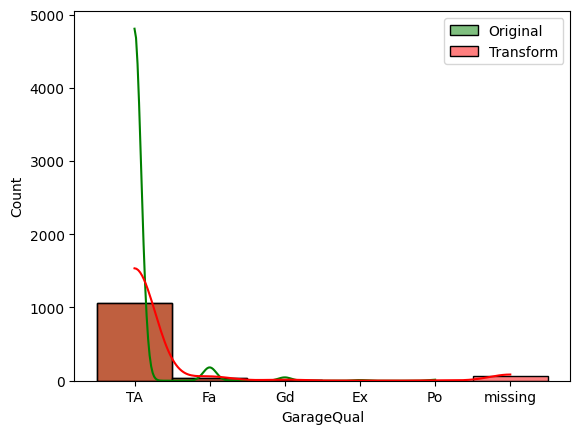

In [17]:
sns.histplot(X_train['GarageQual'], kde=True, color='green', label='Original')
sns.histplot(new_df['GarageQual'], kde=True, color='red', label='Transform')

plt.legend()
plt.show()

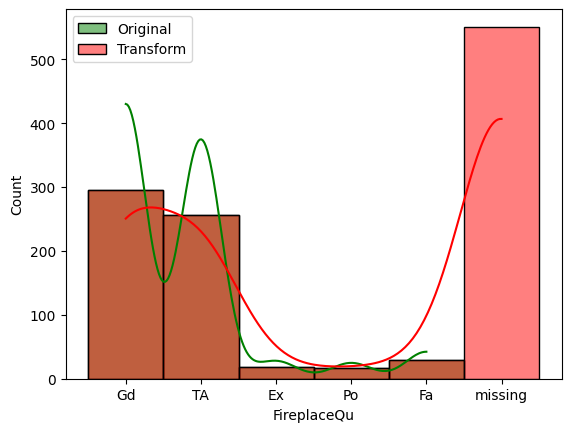

In [18]:
sns.histplot(X_train['FireplaceQu'], kde=True, color='green', label='Original')
sns.histplot(new_df['FireplaceQu'], kde=True, color='red', label='Transform')

plt.legend()
plt.show()